<a href="https://colab.research.google.com/github/loandev-py/ChallengeTelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_json('/content/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

## conoce el conjunto de datos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [18]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

## Normaliazndo datos


In [19]:
#Normalizando todas las columnas para depues unirlas en un solo data frame parea poder tranbajar con valores unicos
df_cliente=pd.json_normalize(df['customer'])
df_account=pd.json_normalize(df['account'])
df_phone=pd.json_normalize(df['phone'])
df_internet=pd.json_normalize(df['internet'])


In [20]:
#Agrupando los df que estaban anidados en uno solo
df_normalizado = pd.concat([df.drop(columns=['customer', 'account','phone','internet']),
                      df_cliente,df_account,df_phone,df_internet], axis=1)
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [21]:
df_normalizado.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1225,1752-OZXFY,No,Male,0,Yes,No,60,One year,Yes,Mailed check,...,3561.15,Yes,No,DSL,Yes,No,No,No,Yes,No
5089,6959-UWKHF,Yes,Male,0,No,No,1,Month-to-month,Yes,Electronic check,...,42.9,Yes,No,DSL,No,No,No,No,No,No
6490,8917-SZTTJ,No,Male,0,Yes,Yes,60,Two year,No,Credit card (automatic),...,1161.75,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
458,0654-HMSHN,Yes,Male,0,Yes,Yes,21,Month-to-month,No,Electronic check,...,2157.95,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
3500,4827-DPADN,No,Female,0,Yes,Yes,72,Two year,Yes,Bank transfer (automatic),...,6042.7,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes


In [22]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   object 
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  PhoneService      7267 non-null   object 
 13  MultipleLines     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [23]:
#Cambiando el tipo de dato de obj a string para id del cliente
df_normalizado['customerID'] = df_normalizado['customerID'].astype('string')

#Validacion de que solo se cuenta con clientes unicos y no existe duplicidad en el data frame
df_normalizado['customerID'].nunique()

7267

In [24]:
#comprobar que tipo de valores uncios tenemos en cada columna

# Columnas a omitir
columnas_omitidas = ['customerID', 'Charges.Monthly', 'Charges.Total']

# Columnas restantes
columnas_analizar = [col for col in df_normalizado.columns if col not in columnas_omitidas]

valores_unicos = {
    col: df_normalizado[col].unique()
    for col in df_normalizado.columns
    if col not in columnas_omitidas
}

valores_unicos

{'Churn': array(['No', 'Yes', ''], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['Yes', 'No'], dtype=object),
 'tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'Contract': array(['One year', 'Month-to-month', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
        'Bank transfer (automatic)'], dtype=object),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'InternetService':

In [25]:
#Remplazamos los valores Yes y No con balores binarios 1 y 0 para poder usarlos
#mas atelante, los valores vacios se eliminaran para este caso

df_normalizado['Churn'] = df_normalizado['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
df_normalizado = df_normalizado.dropna(subset=['Churn']).copy()
df_normalizado['Churn'] = df_normalizado['Churn'].astype(int)
df_normalizado['Churn'].info()


<class 'pandas.core.series.Series'>
Index: 7043 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 110.0 KB


/tmp/ipython-input-3551347895.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado['Churn'] = df_normalizado['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})


In [26]:
#Desiganmos en cuales columnas necesitamos hacer el cambio binarioo
columnas_binarias = ['Partner', 'Dependents','PaperlessBilling','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# Reemplazar valores en columnas binarias
df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0,'No phone service': 0,
                                                                               'No internet service': 0})

# Convertir a tipo entero
df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].astype(int)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   int64  
 9   PaymentMethod     7043 non-null   object 
 10  Charges.Monthly   7043 non-null   float64
 11  Charges.Total     7043 non-null   object 
 12  PhoneService      7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   int64  
 16  OnlineBackup      7043 non-null   int64  
 17  

/tmp/ipython-input-724815133.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0,'No phone service': 0,


In [27]:
# Convertir a tipo string
columnas_string=['gender','Contract','InternetService']
df_normalizado[columnas_string] = df_normalizado[columnas_string].astype('string')


#Convierte el cargo total en flotante
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

#Comprobamos el resultado
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   string 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   Contract          7043 non-null   string 
 8   PaperlessBilling  7043 non-null   int64  
 9   PaymentMethod     7043 non-null   object 
 10  Charges.Monthly   7043 non-null   float64
 11  Charges.Total     7032 non-null   float64
 12  PhoneService      7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   string 
 15  OnlineSecurity    7043 non-null   int64  
 16  OnlineBackup      7043 non-null   int64  
 17  

In [ ]:
df_normalizado['DiaryCharge'] = (df_normalizado['Charges.Monthly'] / 30).round(2)

In [28]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,0,Female,0,1,1,9,One year,1,Mailed check,...,593.30,1,0,DSL,0,1,0,1,1,0
1,0003-MKNFE,0,Male,0,0,0,9,Month-to-month,0,Mailed check,...,542.40,1,1,DSL,0,0,0,0,0,1
2,0004-TLHLJ,1,Male,0,0,0,4,Month-to-month,1,Electronic check,...,280.85,1,0,Fiber optic,0,0,1,0,0,0
3,0011-IGKFF,1,Male,1,1,0,13,Month-to-month,1,Electronic check,...,1237.85,1,0,Fiber optic,0,1,1,0,1,1
4,0013-EXCHZ,1,Female,1,1,0,3,Month-to-month,1,Mailed check,...,267.40,1,0,Fiber optic,0,0,0,1,1,0


# 📊 Carga y análisis(L - Load & Analysis)


In [29]:
df_normalizado.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2283.300441,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.771362,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,401.450000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


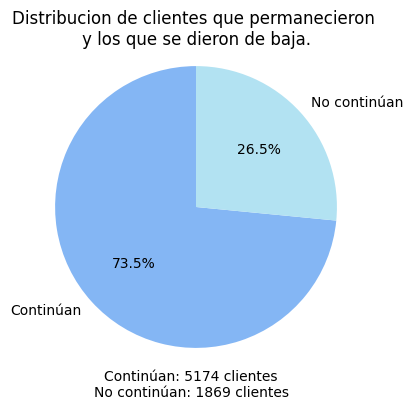

In [30]:
# Conteo de clientes
churn_conteo = df_normalizado['Churn'].value_counts()

# Etiquetas personalizadas
labels = ['Continúan', 'No continúan']

# Texto de la leyenda con conteo
legend_labels = [f'{label}: {conteo} clientes' for label, conteo in zip(labels, churn_conteo)]

# Gráfico de pastel
plt.figure(figsize=(4,4))
plt.pie(churn_conteo, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#84b6f4', '#b2e2f2', ])
# Leyendas
plt.title('Distribucion de clientes que permanecieron \ny los que se dieron de baja.',loc='center', fontsize=12)
leyenda_text = '\n'.join(legend_labels)
plt.figtext(0.5, 0.02, leyenda_text, ha='center', fontsize=10)


plt.axis('equal')
plt.show()


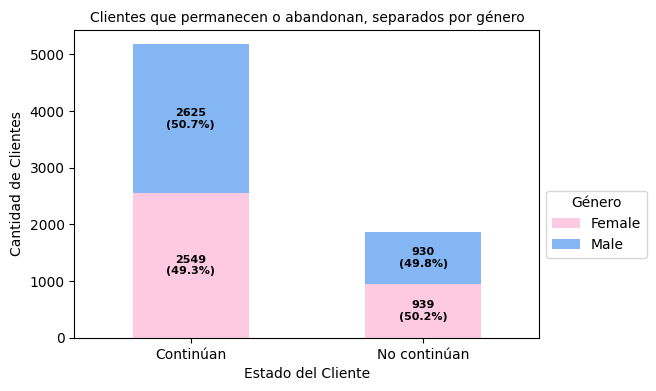

In [31]:
#Agrupamos por genero y estado del cliente para crear una barra apilada
grupo = df_normalizado.groupby(['Churn', 'gender']).size().unstack()
grupo.index = ['Continúan', 'No continúan']
#Grafico apliado
ax = grupo.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#fdcae1', '#84b6f4'])

# formato de Etiquetas de las barras
for i, fila in enumerate(grupo.values):
    total = 0
    suma_fila = fila.sum()
    for valor in fila:
        if valor > 0:
            porcentaje = valor / suma_fila * 100
            ax.text(i, total + valor / 2, f'{valor}\n({porcentaje:.1f}%)',
                    ha='center', va='center', color='black', fontweight='bold', fontsize=8)
        total += valor


# Leyendas
ax.set_title('Clientes que permanecen o abandonan, separados por género', fontsize=10)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Cantidad de Clientes')
ax.legend(title='Género',  loc='upper left', bbox_to_anchor=(1, .5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


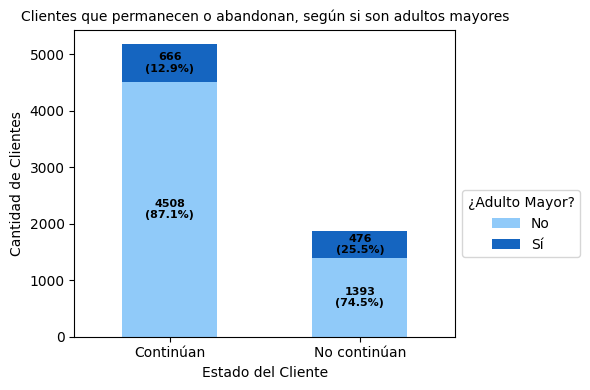

In [32]:
# Agrupar por estado del cliente y si es adulto mayor o no
grupo_clientes = df_normalizado.groupby(['Churn', 'SeniorCitizen']).size().unstack()
grupo_clientes.index = ['Continúan', 'No continúan']

#Grafico apilados
ax = grupo_clientes.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#90caf9', '#1565c0'])

# formato de Etiquetas de las barras
for i, fila in enumerate(grupo_clientes.values):
    acumulado = 0
    for indice, cantidad in enumerate(fila):
        if cantidad > 0:
            porcentaje = cantidad / fila.sum() * 100
            ax.text(i, acumulado + cantidad / 2, f'{cantidad}\n({porcentaje:.1f}%)',
                      ha='center', va='center', color='black', fontweight='bold', fontsize=8)
        acumulado += cantidad

# Leyendas
ax.set_title('Clientes que permanecen o abandonan, según si son adultos mayores', fontsize=10)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Cantidad de Clientes')
ax.legend(title='¿Adulto Mayor?', labels=['No', 'Sí'],  loc='upper left', bbox_to_anchor=(1, .5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

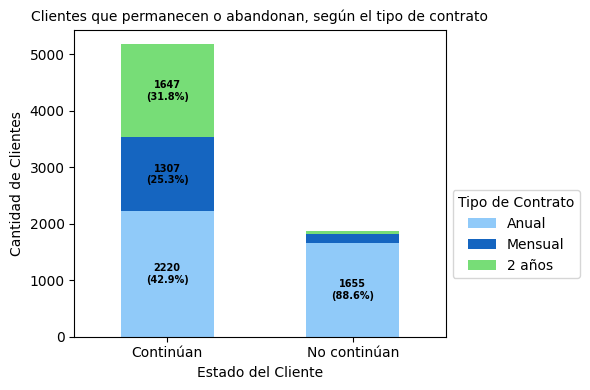

In [33]:
# Agrupar por tipo de contrato y si es cliente
grupo_clientes2 = df_normalizado.groupby(['Churn', 'Contract']).size().unstack()
grupo_clientes2.index = ['Continúan', 'No continúan']

# Gráfico de barras apiladas
ax = grupo_clientes2.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#90caf9', '#1565c0', '#77dd77'])

# Agregar etiquetas numéricas solo para valores > 200
for i, fila in enumerate(grupo_clientes2.values):
    acumulado = 0
    for j, cantidad in enumerate(fila):
        if cantidad > 200:
            porcentaje = cantidad / fila.sum() * 100
            texto = f'{cantidad}\n({porcentaje:.1f}%)'
            ax.text(i, acumulado + cantidad / 2, texto,
                    ha='center', va='center', fontsize=7, fontweight='bold')
        acumulado += cantidad

# Títulos y etiquetas
ax.set_title('Clientes que permanecen o abandonan, según el tipo de contrato', fontsize=10)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Cantidad de Clientes')
ax.legend(title='Tipo de Contrato', labels=['Anual', 'Mensual', '2 años'],  loc='upper left', bbox_to_anchor=(1, .5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4136305530.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentaje = (valor / totales_churn[j]) * 100


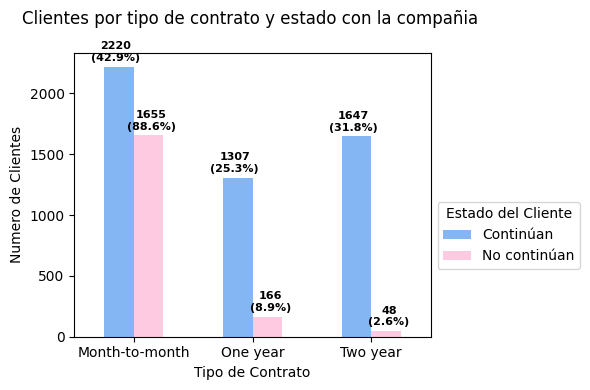

In [34]:
# Agrupar por tipo de contrato y estado del cliente
grupo_agrupado = df_normalizado.groupby(['Contract', 'Churn']).size().unstack()
grupo_agrupado.columns = ['Continúan', 'No continúan']
totales_churn = grupo_agrupado.sum()

# Crear gráfico
ax = grupo_agrupado.plot(kind='bar', figsize=(6, 4), color=['#84b6f4', '#fdcae1'])

# Añadir etiquetas con cantidad y porcentaje respecto al total de cada columna
for i, fila in enumerate(grupo_agrupado.values):
    for j, valor in enumerate(fila):
        if valor > 0:
            porcentaje = (valor / totales_churn[j]) * 100
            ax.text(i + (j - 0.5) * 0.3, valor + 30, f'{valor}\n({porcentaje:.1f}%)',
                    ha='center', va='bottom', fontsize=8, fontweight='bold')

# Etiquetas y formato
ax.set_title('Clientes por tipo de contrato y estado con la compañia \n ', fontsize=12)
ax.set_xlabel('Tipo de Contrato')
ax.set_ylabel('Numero de Clientes')
ax.legend(title='Estado del Cliente', loc='upper left', bbox_to_anchor=(1, .5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


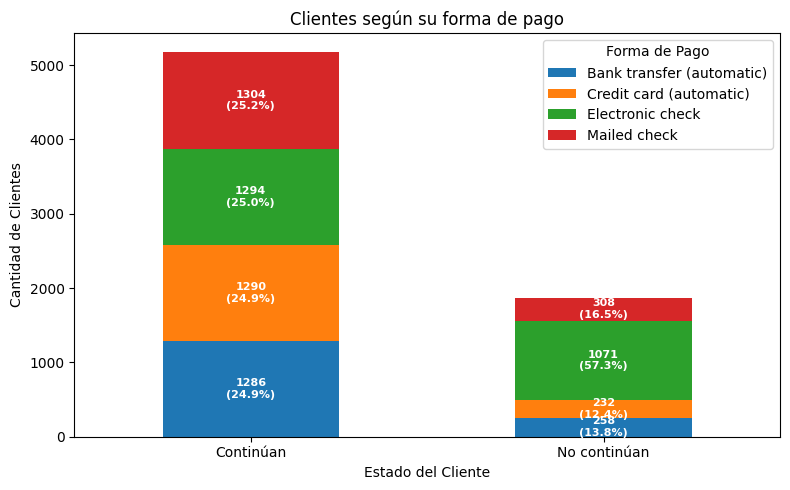

In [35]:
# Agrupar por Churn y PaymentMethod
grupo_pago = df_normalizado.groupby(['Churn', 'PaymentMethod']).size().unstack()
grupo_pago.index = ['Continúan', 'No continúan']

# Crear gráfico de barras apiladas
ax = grupo_pago.plot(kind='bar', stacked=True, figsize=(8, 5))

# Agregar etiquetas con conteo y porcentaje relativo al grupo
for i, fila in enumerate(grupo_pago.values):
    total = fila.sum()
    acumulado = 0
    for j, valor in enumerate(fila):
        if valor > 0:
            porcentaje = valor / total * 100
            ax.text(i, acumulado + valor / 2, f'{valor}\n({porcentaje:.1f}%)',
                    ha='center', va='center', color='white', fontsize=8, fontweight='bold')
            acumulado += valor

# Títulos y etiquetas
ax.set_title('Clientes según su forma de pago', fontsize=12)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Cantidad de Clientes')
ax.legend(title='Forma de Pago', loc='upper right')
ax.set_xticklabels(grupo_pago.index, rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1319407411.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Si', 'No'])
/tmp/ipython-input-1319407411.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Si', 'No'])


ValueError: Could not interpret value `DiaryCharge` for `y`. An entry with this name does not appear in `data`.

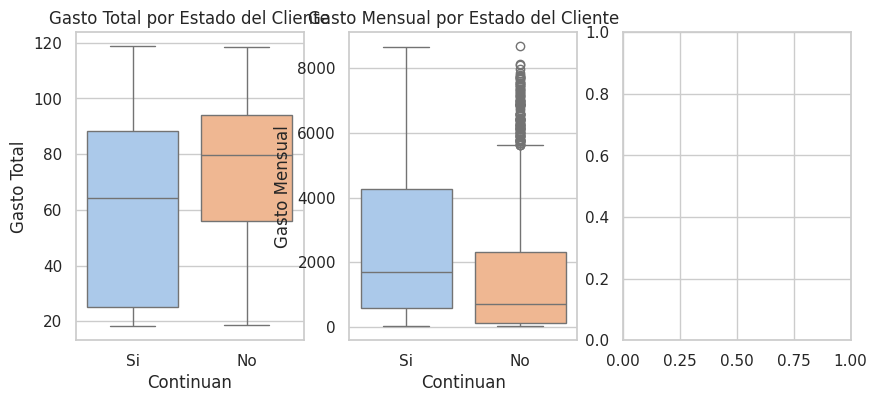

In [36]:
# Estilo visual
sns.set(style="whitegrid")

# Crear figura
fig, axes = plt.subplots(1, 3, figsize=(10, 4))


# Gasto  Total
sns.boxplot(x='Churn', y='Charges.Total', hue='Churn', data=df_normalizado, ax=axes[1],
            palette='pastel', legend=False)
axes[0].set_title('Gasto Total por Estado del Cliente')
axes[0].set_ylabel('Gasto Total')
axes[0].set_xlabel('Continuan')
axes[0].set_xticklabels(['Si', 'No'])


# Gasto mensual
sns.boxplot(x='Churn', y='Charges.Monthly', hue='Churn', data=df_normalizado, ax=axes[0],
            palette='pastel', legend=False)
axes[1].set_title('Gasto Mensual por Estado del Cliente')
axes[1].set_ylabel('Gasto Mensual')
axes[1].set_xlabel('Continuan')
axes[1].set_xticklabels(['Si', 'No'])



# Gasto diario
sns.boxplot(x='Churn', y='DiaryCharge', hue='Churn', data=df_normalizado, ax=axes[2],
            palette='pastel', legend=False)
axes[2].set_title('Gasto Diario por Estado del Cliente')
axes[2].set_ylabel('Gasto Diario')
axes[2].set_xlabel('Continuan')
axes[2].set_xticklabels(['Si', 'No'])

# Ajustar espacio
plt.tight_layout()
plt.show()


#📄Informe final

## introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión(abandono) ocurre cuando los clientes deciden dejar de utilizar el servicio. Identificar los patrones relacionados con esta conducta puede ayudar a reducir la pérdida de clientes, mejorar la retención y optimizar las estrategias de fidelización.

## Limpieza y Tratamiento

Se realizaron los siguientes pasos para preparar los datos:

Importación del dataset con pandas.

Conversión de variables categóricas codificadas como 'Yes'/'No', 'Male'/'Female', '0'/'1' a valores numéricos o etiquetas legibles ('Sí'/'No', 'Masculino'/'Femenino')(Binarios).

Identificación y tratamiento de valores nulos o inconsistentes.

## Analisis Exploratorio

Se realizaron diversas visualizaciones y estadísticas para entender los patrones de Churn:

Distribución de clientes por género y churn

Se usaron barras apiladas para mostrar la cantidad y porcentaje de hombres y mujeres que permanecen o abandonan.

Clientes mayores (senior) y churn

Los adultos mayores tienden a abandonar con más frecuencia que otros grupos de edad.

Tipo de contrato vs churn

Clientes con contratos mensuales tienen mayor tasa de evasión.

Contratos a largo plazo (anual/2 años) retienen mejor a los clientes.

Método de pago y churn

Métodos automáticos (como tarjeta o transferencia) se asocian con menor evasión comparado con métodos manuales como cheque.

Gasto mensual, anual y diario por churn

Los clientes que abandonan tienden a tener gastos más bajos, especialmente en gasto mensual y diario.

Boxplots Comparativos

Se comparó el gasto total, mensual y diario entre quienes se quedan y quienes se van, revelando diferencias claras en los promedios y la dispersión.

## conclusiones

El tipo de contrato es uno de los factores más influyentes: contratos mensuales muestran mayor evasión.

Clientes mayores tienen una mayor tasa de churn.

Métodos de pago automáticos ayudan a mantener a los clientes activos.

Clientes con menor gasto mensual o diario tienen más probabilidades de irse, posiblemente por no ver valor suficiente en el servicio.

No hay una diferencia marcada en churn por género, pero sí por edad y tipo de pago.

## Recomendaciones

Fomentar contratos de largo plazo con beneficios o descuentos exclusivos.

Incentivar el uso de métodos de pago automáticos mediante promociones.

Diseñar campañas específicas para adultos mayores, como asistencia personalizada o planes simplificados.

Ofrecer valor añadido a clientes con bajo gasto mensual para evitar su salida.

Implementar un sistema de alerta temprana para detectar patrones de churn y actuar preventivamente.